In [2]:
import numpy as np #Нужные библиотеки
import matplotlib.pyplot as plt

In [3]:
def least_squares(x_arr, y_arr): #Подпрограмма МНК для прямой
    size= x_arr.shape[0]
    b=(np.sum(y_arr)*np.sum(x_arr**2)-np.sum(x_arr)*np.sum(x_arr*y_arr))/(size*np.sum(x_arr**2)-np.sum(x_arr)**2)
    a=(np.sum(y_arr)-size*b)/np.sum(x_arr)
    return a, b

In [4]:
N=[] #Массив из чисел от 100 до 1000000
i=100
while i<=1000000:
    N.append(i)
    i=i+1
N=np.array(N)
print("First stage has ended")

with open('sf.txt', 'r') as file: #Парсинг sf
    lines=file.readlines()
sf_data_worst=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('bf.txt', 'r') as file: #Парсинг bf
    lines=file.readlines()
bf_data_worst=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

First stage has ended
Second stage has ended
Third stage has ended


In [5]:
print(np.min(sf_data_worst))
print(np.max(sf_data_worst))
print(np.min(bf_data_worst))
print(np.max(bf_data_worst))

-2003799700
101282000
300
23570700


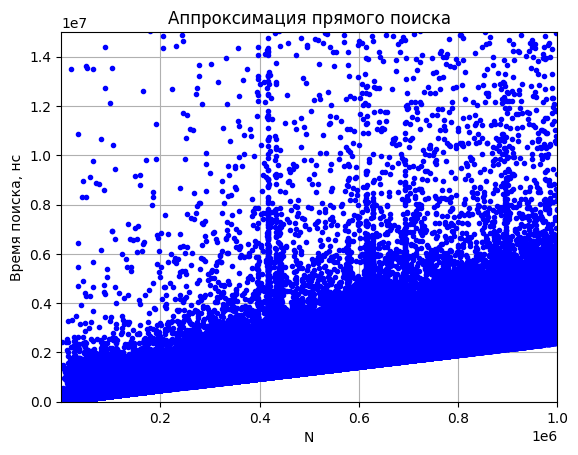

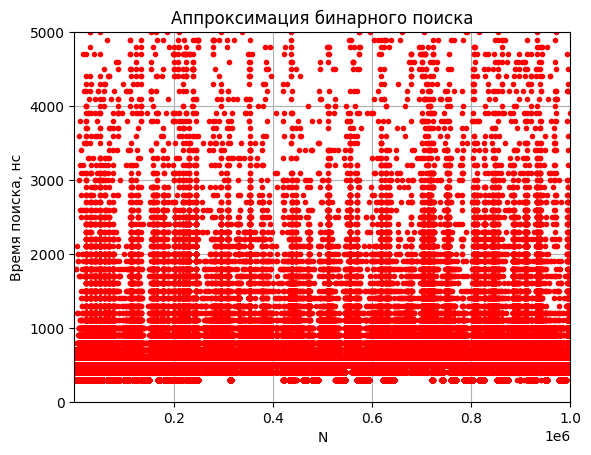

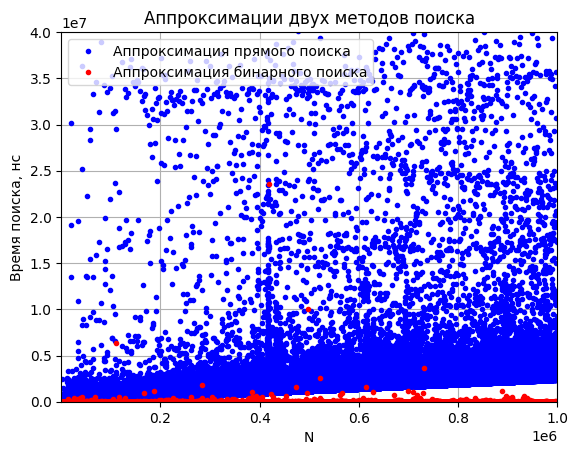

In [23]:
fig, str_worst = plt.subplots()
fig, bin_worst = plt.subplots()
fig, str_and_bin_worst = plt.subplots()

str_worst.plot(N, sf_data_worst, '.', color='b', label="Аппроксимация прямого поиска")
str_worst.grid()

bin_worst.plot(N, bf_data_worst, '.', color='r', label="Аппроксимация бинарного поиска")
bin_worst.grid()

str_and_bin_worst.plot(N, sf_data_worst, '.', color='b', label="Аппроксимация прямого поиска")
str_and_bin_worst.plot(N, bf_data_worst, '.', color='r', label="Аппроксимация бинарного поиска")
str_and_bin_worst.grid()

str_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Аппроксимация прямого поиска', ylim=(0, 1.5*10**7), xlim=(100, 1000000)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
bin_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Аппроксимация бинарного поиска', ylim=(0, 5000), xlim=(100, 1000000))
str_and_bin_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Аппроксимации двух методов поиска', ylim=(0, 0.4*10**8), xlim=(100, 1000000))
str_and_bin_worst.legend()

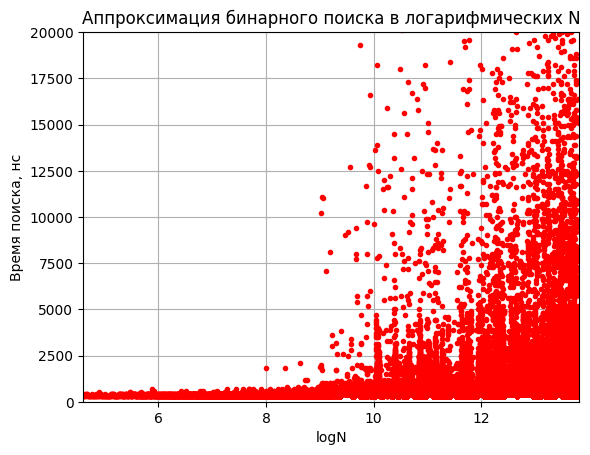

In [19]:
#Проверим логарифмичность
fig, bin_worst_logcheck = plt.subplots()
bin_worst_logcheck.plot(np.log(N), bf_data_worst, '.', color='r')
bin_worst_logcheck.set(xlabel='logN', ylabel='Время поиска, нс', title='Аппроксимация бинарного поиска в логарифмических N', ylim=(0, 20000), xlim=(np.log(100), np.log(1000000)))
bin_worst_logcheck.grid()

Для прямого поиска нетрудно заметить нижнюю прямую, ограничивающую минимальное время поиска элемента, которого нет в массиве, а для бинарного поиска прямая незаметна ни в обычном масштабе, ни в логарифмическом. Минимальное время поиска кажется постоянным, потому что оно очень медленно растёт.
Кроме того, много точек выбиваются из общей картины (в прямом поиске есть даже точка с отрицательным значением времени, её происхождение неизвестно), значит эксперимент имеет невысокую точность.
Проведём аналогичные измерения для поиска случайных чисел.

In [20]:
with open('sfr.txt', 'r') as file: #Парсинг sfr
    lines=file.readlines()
sf_data_random=np.array([int(line.strip()) for line in lines])
print("First stage has ended")

with open('bfr.txt', 'r') as file: #Парсинг bfr
    lines=file.readlines()
bf_data_random=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

First stage has ended
Second stage has ended


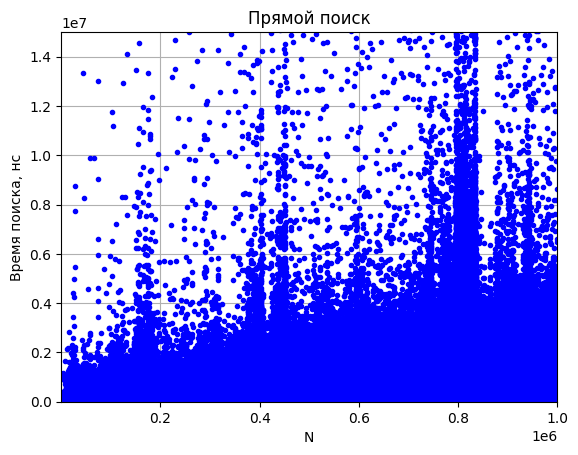

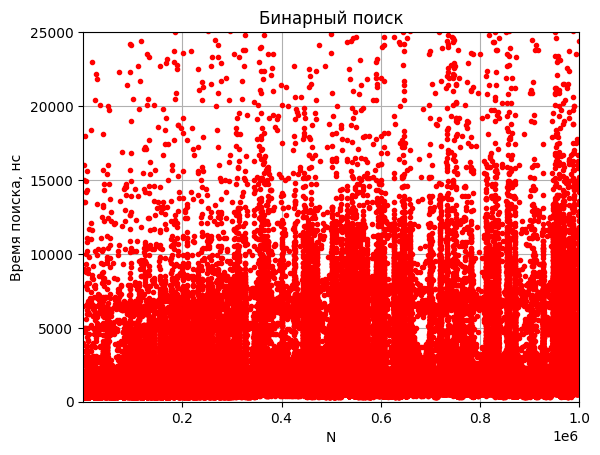

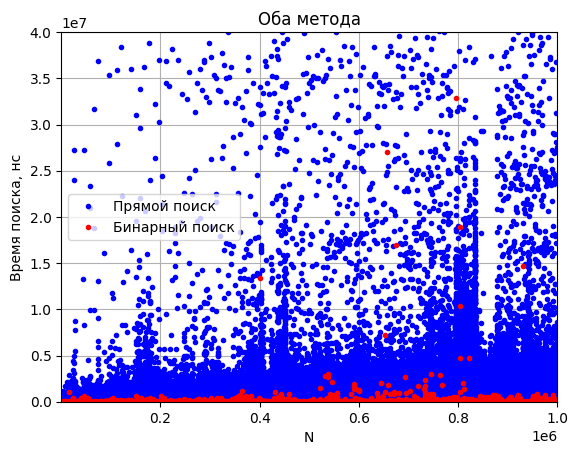

In [25]:
fig, str_random = plt.subplots()
fig, bin_random = plt.subplots()
fig, str_and_bin_random = plt.subplots()

str_random.plot(N, sf_data_random, '.', color='b', label="Прямой поиск")
str_random.grid()

bin_random.plot(N, bf_data_random, '.', color='r', label="Бинарный поиск")
bin_random.grid()

str_and_bin_random.plot(N, sf_data_random, '.', color='b', label="Прямой поиск")
str_and_bin_random.plot(N, bf_data_random, '.', color='r', label="Бинарный поиск")
str_and_bin_random.grid()

str_random.set(xlabel='N', ylabel='Время поиска, нс', title='Прямой поиск', ylim=(0, 1.5*10**7), xlim=(100, 1000000)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
bin_random.set(xlabel='N', ylabel='Время поиска, нс', title='Бинарный поиск', ylim=(0, 25000), xlim=(100, 1000000))
str_and_bin_random.set(xlabel='N', ylabel='Время поиска, нс', title='Оба метода', ylim=(0, 0.4*10**8), xlim=(100, 1000000))
str_and_bin_random.legend()

По графикам видно, что бинарный поиск намного эффективнее прямого.

Построим графики для суммы двух.

In [39]:
N=[] #Массив из чисел от 100 до 10000
i=100
while i<=10000:
    N.append(i)
    i=i+1
N=np.array(N)
print("First stage has ended")

with open('ssfr.txt', 'r') as file: #Парсинг ssft
    lines=file.readlines()
ss_data_random=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('epfr.txt', 'r') as file: #Парсинг epfr
    lines=file.readlines()
ep_data_random=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

First stage has ended
Second stage has ended
Third stage has ended


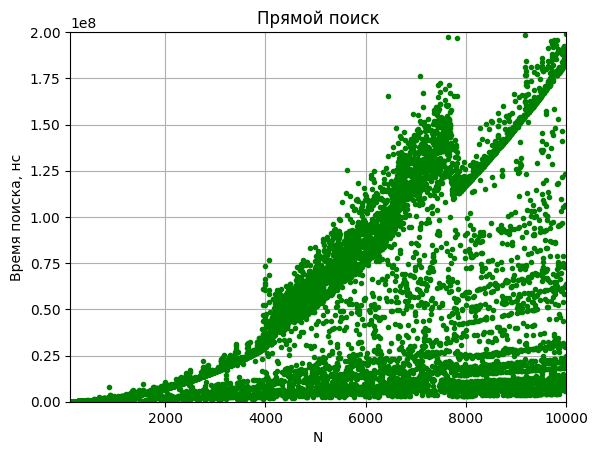

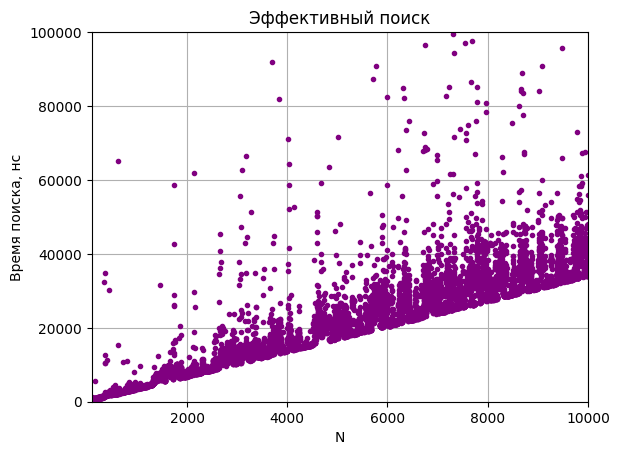

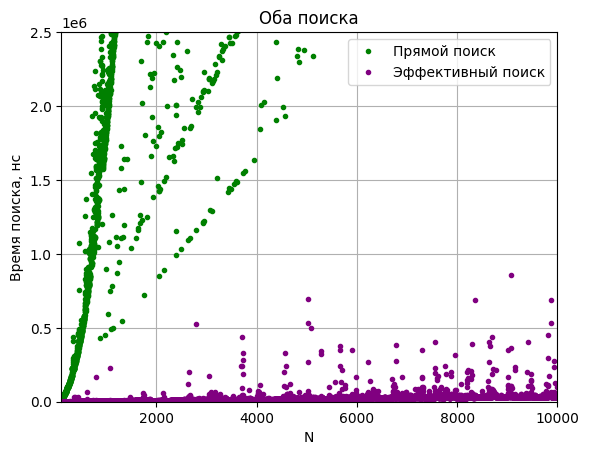

In [43]:
fig, s_random = plt.subplots()
fig, e_random = plt.subplots()
fig, s_and_e_random = plt.subplots()

s_random.plot(N, ss_data_random, '.', color='green', label="Прямой поиск")
s_random.grid()

e_random.plot(N, ep_data_random, '.', color='purple', label="Эффективный поиск")
e_random.grid()

s_and_e_random.plot(N, ss_data_random, '.', color='green', label="Прямой поиск")
s_and_e_random.plot(N, ep_data_random, '.', color='purple', label="Эффективный поиск")
s_and_e_random.grid()

s_random.set(xlabel='N', ylabel='Время поиска, нс', title='Прямой поиск', xlim=(100, 10000), ylim=(0, 2*10**8)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
e_random.set(xlabel='N', ylabel='Время поиска, нс', title='Эффективный поиск', xlim=(100, 10000), ylim=(0, 100000))
s_and_e_random.set(xlabel='N', ylabel='Время поиска, нс', title='Оба поиска', xlim=(100, 10000), ylim=(0, 0.25*10**7))
s_and_e_random.legend()

[Text(0.5, 0, 'N^2'),
 Text(0, 0.5, 'Время поиска, нс'),
 Text(0.5, 1.0, 'Прямой поиск'),
 (10000.0, 100000000.0),
 (0.0, 200000000.0)]

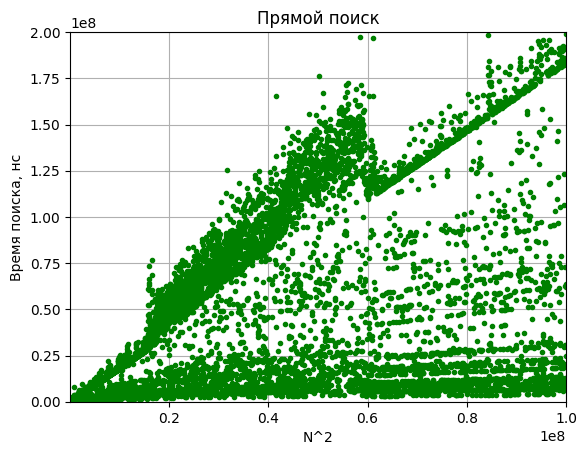

In [47]:
fig, s_random_qua = plt.subplots()
s_random_qua.plot(N**2, ss_data_random, '.', color='green', label="Прямой поиск")
s_random_qua.grid()
s_random_qua.set(xlabel='N^2', ylabel='Время поиска, нс', title='Прямой поиск', xlim=(10000, 100000000), ylim=(0, 2*10**8))

Действительно, прямой поиск имеет квадратичную асимптотическую сложность от N, а эффективный поиск линейную.
Однако есть огромное множество точек, которые нашлись очень быстро.
Проведём оценку худшей ситуации.

In [48]:
with open('ssfw.txt', 'r') as file: #Парсинг ssfw
    lines=file.readlines()
ss_data_worst=np.array([int(line.strip()) for line in lines])
print("First stage has ended")

with open('epfw.txt', 'r') as file: #Парсинг epfw
    lines=file.readlines()
ep_data_worst=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

First stage has ended
Second stage has ended


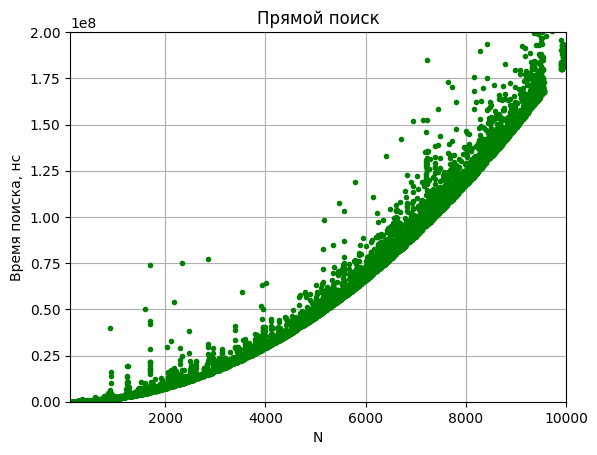

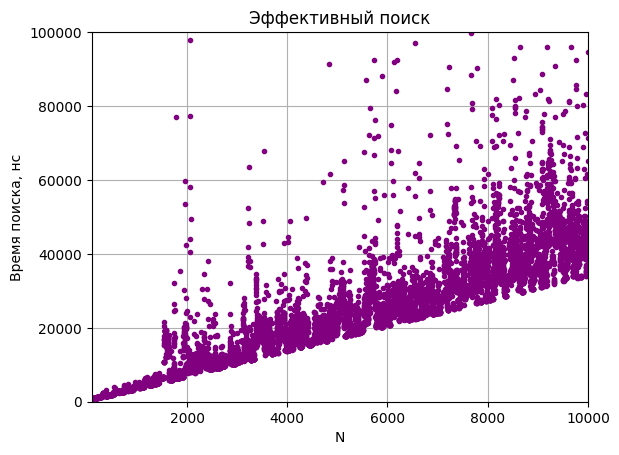

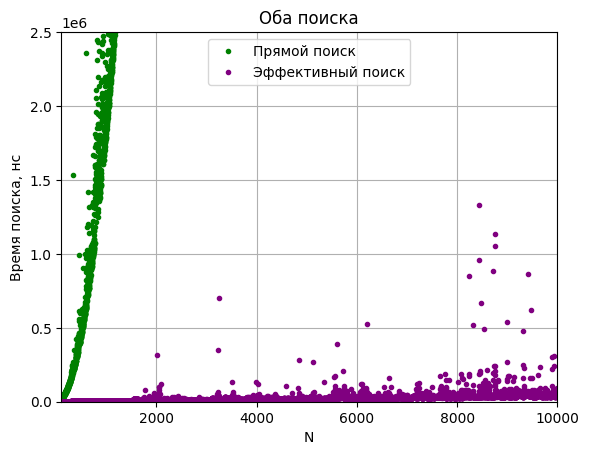

In [50]:
fig, s_worst = plt.subplots()
fig, e_worst = plt.subplots()
fig, s_and_e_worst = plt.subplots()

s_worst.plot(N, ss_data_worst, '.', color='green', label="Прямой поиск")
s_worst.grid()

e_worst.plot(N, ep_data_worst, '.', color='purple', label="Эффективный поиск")
e_worst.grid()

s_and_e_worst.plot(N, ss_data_worst, '.', color='green', label="Прямой поиск")
s_and_e_worst.plot(N, ep_data_worst, '.', color='purple', label="Эффективный поиск")
s_and_e_worst.grid()

s_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Прямой поиск', xlim=(100, 10000), ylim=(0, 2*10**8)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
e_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Эффективный поиск', xlim=(100, 10000), ylim=(0, 100000))
s_and_e_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Оба поиска', xlim=(100, 10000), ylim=(0, 0.25*10**7))
s_and_e_worst.legend()

[Text(0.5, 0, 'N^2'),
 Text(0, 0.5, 'Время поиска, нс'),
 Text(0.5, 1.0, 'Прямой поиск'),
 (10000.0, 100000000.0),
 (0.0, 200000000.0)]

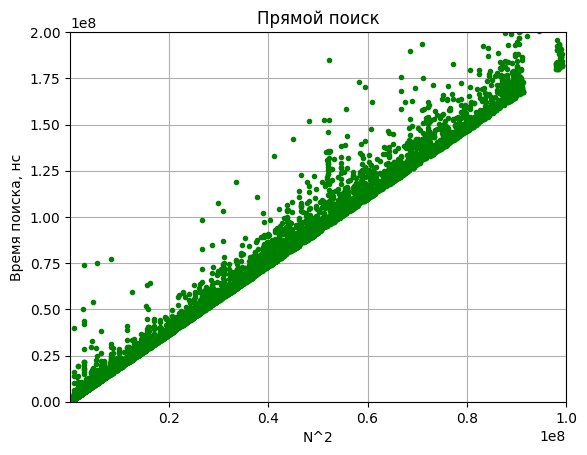

In [51]:
fig, s_worst_qua = plt.subplots()
s_worst_qua.plot(N**2, ss_data_worst, '.', color='green', label="Прямой поиск")
s_worst_qua.grid()
s_worst_qua.set(xlabel='N^2', ylabel='Время поиска, нс', title='Прямой поиск', xlim=(10000, 100000000), ylim=(0, 2*10**8))

График худшего случая более наглядный.

Для проверки скоростей стратегий будем пользоваться прямым поиском, потому что суть стратегии в перемещении частого элемента на первое место, что хорошо для прямого поиска, но плохо для бинарного.

In [52]:
N=[] #Массив из чисел от 100 до 100000
i=100
while i<=100000:
    N.append(i)
    i=i+1
N=np.array(N)
print("First stage has ended")

with open('srtA1.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strA1=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('srtA2.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strA2=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

with open('srtB1.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strB1=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('srtB2.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strB2=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

with open('srtC1.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strC1=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('srtC2.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strC2=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

First stage has ended
Second stage has ended
Third stage has ended
Second stage has ended
Third stage has ended
Second stage has ended
Third stage has ended


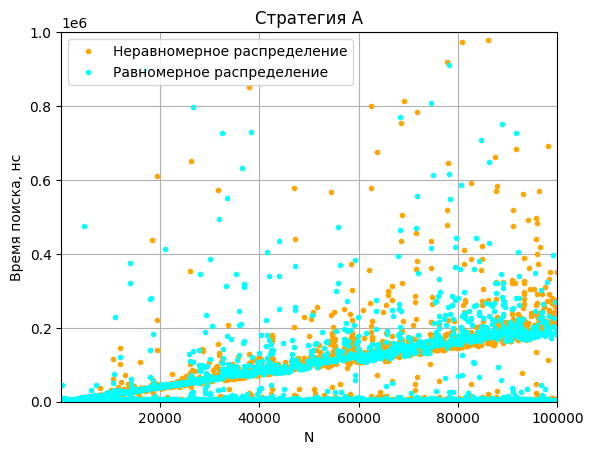

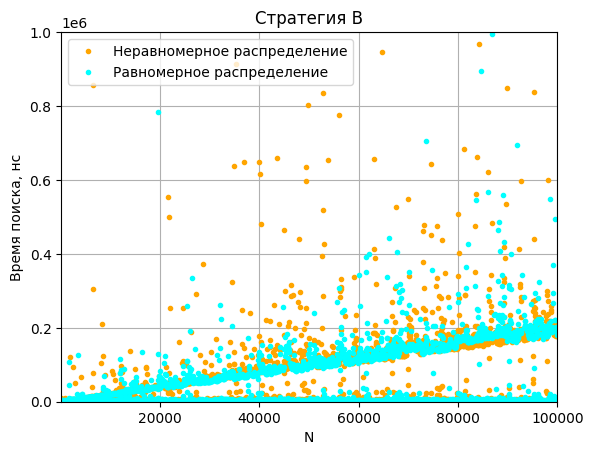

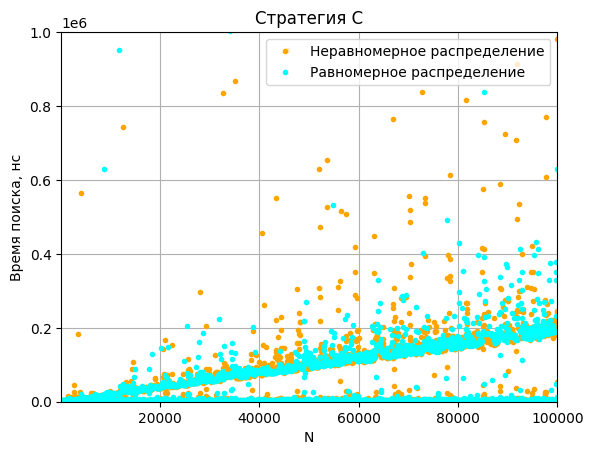

In [55]:
fig, A = plt.subplots()
fig, B = plt.subplots()
fig, C = plt.subplots()
#fig, ABC = plt.subplots()

A.plot(N, strA1, '.', color='orange', label="Неравномерное распределение")
A.plot(N, strA2, '.', color='cyan', label="Равномерное распределение")
A.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия A', xlim=(100, 100000), ylim=(0, 10**6))
A.legend()
A.grid()

B.plot(N, strB1, '.', color='orange', label="Неравномерное распределение")
B.plot(N, strB2, '.', color='cyan', label="Равномерное распределение")
B.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия B', xlim=(100, 100000), ylim=(0, 10**6))
B.legend()
B.grid()

C.plot(N, strC1, '.', color='orange', label="Неравномерное распределение")
C.plot(N, strC2, '.', color='cyan', label="Равномерное распределение")
C.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия C', xlim=(100, 100000), ylim=(0, 10**6))
C.legend()
C.grid()

У всех стратегий равномерное и неравномерное распределения совпадают, сделаем второе более неравномерным. Из графиков видно, что в равномерном случае все стратегии близки к обычному прямому перебору.

In [56]:
with open('srtA22.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strA22=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

with open('srtB22.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strB22=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('srtC22.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strC22=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

Third stage has ended
Second stage has ended
Third stage has ended


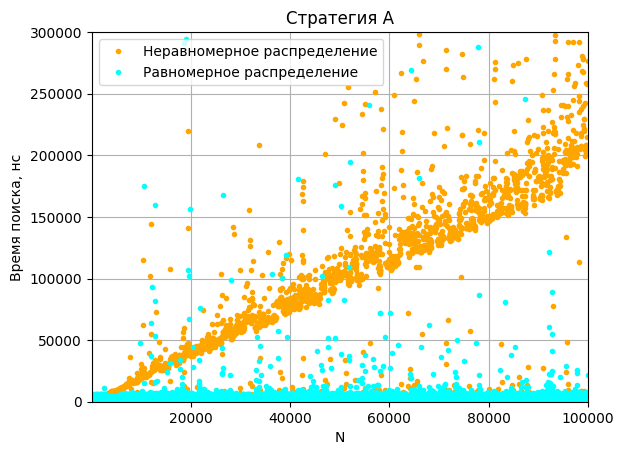

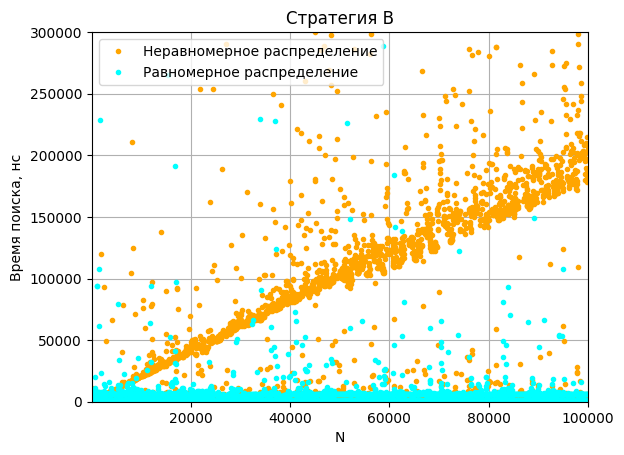

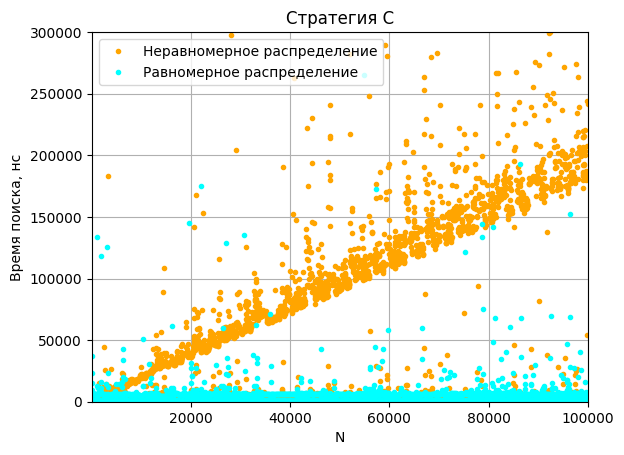

In [58]:
fig, An = plt.subplots()
fig, Bn = plt.subplots()
fig, Cn = plt.subplots()
#fig, ABC = plt.subplots()

An.plot(N, strA1, '.', color='orange', label="Неравномерное распределение")
An.plot(N, strA22, '.', color='cyan', label="Равномерное распределение")
An.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия A', xlim=(100, 100000), ylim=(0, 3*10**5))
An.legend()
An.grid()

Bn.plot(N, strB1, '.', color='orange', label="Неравномерное распределение")
Bn.plot(N, strB22, '.', color='cyan', label="Равномерное распределение")
Bn.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия B', xlim=(100, 100000), ylim=(0, 3*10**5))
Bn.legend()
Bn.grid()

Cn.plot(N, strC1, '.', color='orange', label="Неравномерное распределение")
Cn.plot(N, strC22, '.', color='cyan', label="Равномерное распределение")
Cn.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия C', xlim=(100, 100000), ylim=(0, 3*10**5))
Cn.legend()
Cn.grid()

Теперь распределение очень неравномерное, при нём стратегии работают намного лучше, сравним стратегии между собой.

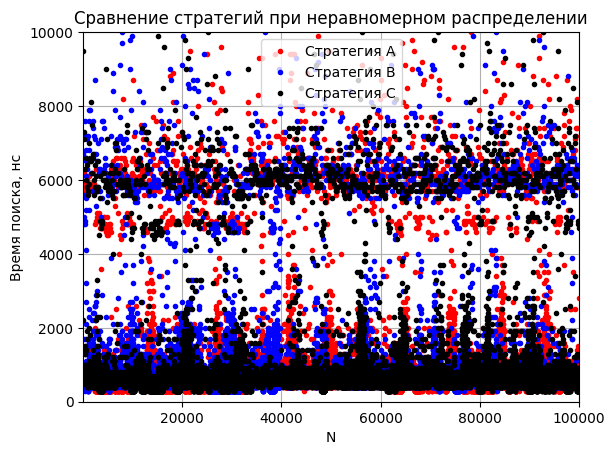

In [60]:
fig, ABC = plt.subplots()
ABC.plot(N, strA22, '.', color='red', label="Стратегия A")
ABC.plot(N, strB22, '.', color='blue', label="Стратегия B")
ABC.plot(N, strC22, '.', color='black', label="Стратегия C")
ABC.set(xlabel='N', ylabel='Время поиска, нс', title='Сравнение стратегий при неравномерном распределении', xlim=(100, 100000), ylim=(0, 10000))
ABC.legend()
ABC.grid()

График не очень информативный, найдём среднее время поиска для всех стратегий.

In [64]:
print("Стратегия A: "+str(np.mean(strA22)))
print("Стратегия B: "+str(np.mean(strB22)))
print("Стратегия C: "+str(np.mean(strC22)))

Стратегия A: 873.9251859340748
Стратегия B: 800.5415361207596
Стратегия C: 1241.9275082331508


В данном распределении самой выгодной оказалась стратегия B, а стратегия C самой невыгодной. Проверим, какая стратегия была самой выгодной в изначальном распределении.

In [65]:
print("Стратегия A: "+str(np.mean(strA2)))
print("Стратегия B: "+str(np.mean(strB2)))
print("Стратегия C: "+str(np.mean(strC2)))

Стратегия A: 2844.6922453228694
Стратегия B: 3529.483188356473
Стратегия C: 2289.8649663166534


В этом распределении (тоже неравномерном) ситуация противоположна. Выбор стратегии зависит от самого распределения: если распределение близко к равномерному, то наилучшей является стратегия C; если в распределении искомых элементов есть сильная зависимость от их значений, то более выгодной является стратегия B.